<a href="https://colab.research.google.com/github/woodstone10/deep_learning_study-python/blob/main/Image_classification_MNIST_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classificaiton for MNIST with PyTorch

---
- PyTorch GPU
- PyTorch Neural Network
- Calcualte accuracy


## GPU usage

In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
device

device(type='cuda')

## Dataset

In [3]:
import torchvision.transforms as transforms
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))])

In [4]:
import torchvision.datasets
trainset = torchvision.datasets.MNIST(root='./data',
                                      train=True,
                                      download=True,
                                      transform=transform)
testset = torchvision.datasets.MNIST(root='./data',
                                      train=False,
                                      download=True,
                                      transform=transform)


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [13]:
from torch.utils.data import DataLoader
train_loader = DataLoader(trainset,
                          batch_size=128,
                          shuffle=True,
                          num_workers=2)
test_loader = DataLoader(testset,
                          batch_size=128,
                          shuffle=False,
                          num_workers=2)

In [14]:
image, label = next(iter(train_loader))
image.shape, label.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

In [15]:
import numpy as np
import matplotlib.pyplot as plt
def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  fig = plt.figure(figsize=(10,5))
  plt.imshow(np.transpose(npimg, (1,2,0)))

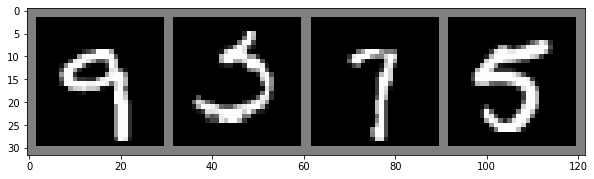

In [16]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images[:4]))

## Model

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 6, 3)
    self.conv2 = nn.Conv2d(6, 16, 3)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
  def forward(self, x):
    x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x
  def num_flat_features(self, x):
    size = x.size()[1:]
    num_features = 1
    for s in size:
      num_features *= s 
    return num_features  

In [18]:
#net = Net() #using CPU
net = Net().to(device) #using GPU
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [19]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 3, 3])


In [20]:
total_batch = len(train_loader)
total_batch

469

In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [22]:
for epoch in range(5):
  running_loss = 0.0
  for i, data in enumerate(train_loader, 0):
    #inputs, labels = data #CPU
    inputs, labels = data[0].to(device), data[1].to(device) #GPU
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    if i % 100 == 99:
      print("Epoch: {}, Iter: {}, Loss: {}".format(epoch+1, i+1, running_loss/2000))
      running_loss = 0

Epoch: 1, Iter: 100, Loss: 0.11523524737358093
Epoch: 1, Iter: 200, Loss: 0.11498580121994019
Epoch: 1, Iter: 300, Loss: 0.11481855082511902
Epoch: 1, Iter: 400, Loss: 0.11465317296981811
Epoch: 2, Iter: 100, Loss: 0.1141817946434021
Epoch: 2, Iter: 200, Loss: 0.1136610096693039
Epoch: 2, Iter: 300, Loss: 0.11286061716079712
Epoch: 2, Iter: 400, Loss: 0.11131604659557343
Epoch: 3, Iter: 100, Loss: 0.10237459272146225
Epoch: 3, Iter: 200, Loss: 0.08365408569574356
Epoch: 3, Iter: 300, Loss: 0.05490769112110138
Epoch: 3, Iter: 400, Loss: 0.03794569234549999
Epoch: 4, Iter: 100, Loss: 0.02629355011880398
Epoch: 4, Iter: 200, Loss: 0.024643757581710814
Epoch: 4, Iter: 300, Loss: 0.022356249690055847
Epoch: 4, Iter: 400, Loss: 0.019240588307380676
Epoch: 5, Iter: 100, Loss: 0.017152708925306796
Epoch: 5, Iter: 200, Loss: 0.01661627575755119
Epoch: 5, Iter: 300, Loss: 0.015353788912296296
Epoch: 5, Iter: 400, Loss: 0.014480737581849099


## Save and Load Model

In [24]:
PATH = './mnist_net.pth'
torch.save(net.state_dict(), PATH)

In [25]:
#net = Net() #CPU
net = Net().to(device) #GPU
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [26]:
net.parameters

<bound method Module.parameters of Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)>

## Model Test

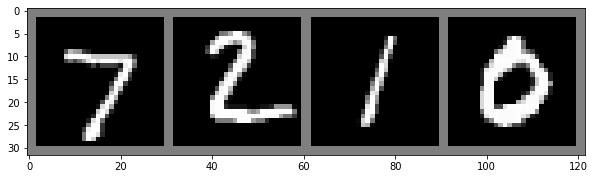

In [36]:
dataiter = iter(test_loader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images[:4]))

In [39]:
#outputs = net(images) #CPU
outputs = net(images.cuda()) #GPU

In [40]:
_, predicted = torch.max(outputs, 1)
predicted

tensor([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 4, 3, 7, 4, 6, 4, 3, 0, 7, 0,
        2, 7, 1, 7, 3, 7, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 4, 3, 1, 4,
        1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 9,
        5, 4, 7, 6, 7, 9, 0, 5], device='cuda:0')

In [43]:
#print(''.join('{}\t'.format(str(predicted[j].numpy())) for j in range(4))) #CPU
print(''.join('{}\t'.format(str(predicted[j].cpu().numpy())) for j in range(4))) #GPU

7	2	1	0	


In [35]:
correct = 0
total = 0
with torch.no_grad():
  for data in test_loader:
    #images, labels = data 
    images, labels = data[0].to(device), data[1].to(device) 
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
100 * correct / total

92.59